# COGS 108 - Final Project

# Overview

Yelp reviews are an important community resource and can often tell you a lot about a specific company, institution, location, etc. I will be analyzing the relationship between Yelp ratings for San Diego parks and the areas they are located in. The analysis can be potentially helpful to lawmakers to determine if the city budget is appropriately allocated to areas in need of repairs or renovation.

# Names & GitHub ID

- Name: Jennifer Wu
- GitHub Username: acctjw

# Research Question

Is there a relationship between Yelp ratings and spatial distribution of parks in San Diego? Are certain areas of the city more likely to contain parks that are rated more favorably by visitors?

## Background and Prior Work

Parks are a vital resource for a city's residents and visitors alike. They provide a safe space for recreation and relaxation, and have been shown to reduce stress and make the area more inviting to potential residents and businesses. [1] The city of San Diego publishes a financial outlook outline every five fiscal years to give you a glimpse into how much renevue they are forecasting, in addition to allocation of funds to specific departments. In the outline, it is stated that the City is planning to build a number of new facilities in an effort to add enrichment to people's lives. This will add some new parks to neighborhoods that have few or none. For the fiscal period from 2020-2024, the City plans to allott around $400,000 towards the construction of Parks and Recreation facilities. [2]

Unfortunately, due to the COVID-19 pandemic, this proposed budget is just a fraction of what it could potentially be. COVID-19 has reduced tourism in many cities, including San Diego, thus substantially reducing revenue. According to Joe Leventhal, the City plans to slash spending for Parks and Recreation by 5.9 million - mainly by cutting recreation center hours. [3] This will undoubtedly affect San Diego parks as well.

For the purpose of this peoject, I will use Yelp ratings as a factor to determine which neighborhoods are in most need of park repairs and renovation. However, as there are hundreds of parks spread across the city, the analysis will be very limited in scope.

References:
- 1) https://conservationtools.org/library_items/729-the-benefits-of-parks-why-america-needs-more-city-parks-and-open-space
- 2) https://www.sandiego.gov/sites/default/files/fiscal_year_2020-2024_five-year_financial_outlook.pdf
- 3) https://timesofsandiego.com/opinion/2020/05/16/san-diego-city-council-should-lead-by-cutting-its-own-budget

# Hypothesis


My hypothesis is that certain areas in San Diego have parks that are more highly rated/favorable than others. Perhaps the parks that are closer to the heart of the city are more popular/more frequently visited than those that are located in lesser-known/lesser traveled parts of San Diego.

# Dataset(s)

- Dataset name: yelp_SD_parks.csv
- Link to dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv
- Number of observations: 833x10
- Description: This dataset consists of information for parks in San Diego county.

# Setup

In [1]:
# Importing necessary packages/modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')

In [2]:
# Reading provided csv dataset into a dataframe
df_parks = pd.read_csv("https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_parks.csv")

# Data Cleaning

In [3]:
# Checking dataframe
df_parks.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [4]:
# Dropping unneeded columns
df_parks = df_parks.drop(columns = ['phone', 'id', 'url', 'longitude', 'latitude', 'is_closed', 'review_count'])

In [5]:
# Filtering names to include just those that end with the word "Park"
df_parks2 = df_parks[df_parks['name'].str.endswith("Park")]

In [6]:
# Checking new dataframe
df_parks2.head()

,name,address,rating
0,Balboa Park,"1549 El Prado San Diego, CA 92101",5.0
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",4.5
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",4.5
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",4.5
4,Bay View Park,"413 1st St Coronado, CA 92118",5.0


In [7]:
# Slicing address column to only include the zip codes and making sure that they are numeric
df_parks2['address'] = df_parks2['address'].str[-5:]
df_parks2 = df_parks2[df_parks2.address.apply(lambda x: x.isnumeric())]

df_parks2['address']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      92101
1      92108
2      92101
3      92116
4      92118
       ...  
820    92118
821    92127
822    92109
830    92101
831    92008
Name: address, Length: 239, dtype: object

In [8]:
# Grouping address column values together and assigning to new dataframe
group_parks = df_parks2.groupby('address')

In [9]:
# Filtering for specific zip code "92101" and assigning to new dataframe
group1 = group_parks.get_group('92101')
group1

,name,address,rating
0,Balboa Park,92101,5.0
2,Waterfront Park,92101,4.5
14,Pioneer Park,92101,4.0
43,Harbor Island Park,92101,4.5
44,Golden Hill Park,92101,4.0
62,The Children's Park,92101,3.0
63,Tweet Street Park,92101,4.5
167,Chicano Park,92101,4.5
427,Horton Plaza Park,92101,3.0
428,Horton Plaza Park,92101,3.0


In [12]:
# Dropping duplicate park entries
group1.drop_duplicates(subset=None, keep="first", inplace=True)
group1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,address,rating
0,Balboa Park,92101,5.0
2,Waterfront Park,92101,4.5
14,Pioneer Park,92101,4.0
43,Harbor Island Park,92101,4.5
44,Golden Hill Park,92101,4.0
62,The Children's Park,92101,3.0
63,Tweet Street Park,92101,4.5
167,Chicano Park,92101,4.5
427,Horton Plaza Park,92101,3.0
471,Plumosa Park,92101,3.5


In [11]:
# Filtering for specific zup code "92110" and assigning to new dataframe
group2 = group_parks.get_group('92110')
group2

,name,address,rating
6,Presidio Park,92110,4.5
34,Heritage Park,92110,4.5
98,Edward Tyler Cramer Park,92110,3.0
100,Bay Park,92110,4.0
109,Western Hills Park,92110,3.5
297,Old Town San Diego State Historic Park,92110,4.0
405,White Deer Park,92110,5.0
666,Silver Terrace Park,92110,4.5


# Data Analysis & Results

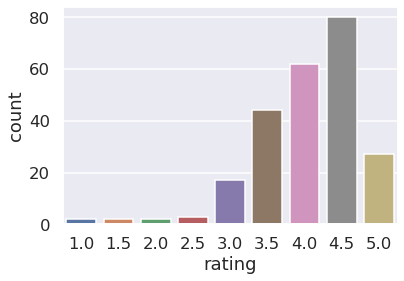

In [14]:
# Plot of dataframe prior to tweaking it to exclude all but two specific zip codes
sns.countplot(data=df_parks2, x='rating')

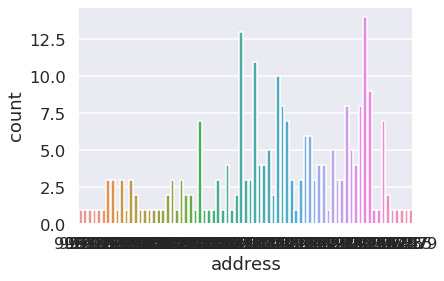

In [15]:
# Way too many different zip codes! Have to narrow it down
sns.countplot(data=df_parks2, x='address')

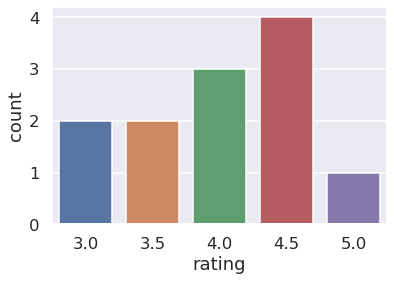

In [16]:
# Visualization of ratings from "92101"
sns.countplot(data=group1, x='rating')

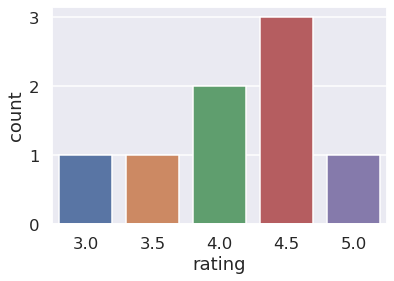

In [17]:
# Visualization of ratings from "92110"
sns.countplot(data=group2, x='rating')

In [18]:
# Calculate mean of ratings from "92101"
group1['rating'].mean()

4.0

In [19]:
# Calculate mean of ratings from "92110"
group2['rating'].mean()

4.125

# Ethics & Privacy

I was provided the dataset for this project, so I have permission to use it for this purpose. The datasets are likely either released for public use, or perhaps from a prior published project; I don't have the source for them.

Because of the fact that the source is unknown, there could potentially be some bias, depending on who collected the data or where it was collected from. The data may also potentially be outdated, if it is from a previous year, so I cannot vouch for its accuracy.

# Conclusion & Discussion

I chose to include a small subset of the data available because it would likely be too time-consuming/confusing to plot a large number of graphs. The analysis was limited to the parks located in two neighborhoods in San Diego: one in downtown San Diego and the other in Clairemont. For reference, the zip code for downtown San Diego is 92101 and the zip code for Clairemont is 92110. I grouped together the parks in each zip code, took the average ratings for each park, and plotted them accordingly. For this reason, my results can only be applicable to these two specific areas in San Diego, and not the city as a whole.

My analysis shows that the distribution of Yelp ratings for parks in the two zip codes is fairly uniform. I calculated the means of the two rating groups and found no significant difference between them (4.0 compared to 4.125). This means that the visitors in both Downtown and Clairemont areas viewed the parks favorably, which disproves my hypothesis.